<a href="https://colab.research.google.com/github/OnyedikachiOnwuachuke/Stock-Price-Prediction-Using-Sentiment-Analysis/blob/main/PREDICTING_TESLA_STOCK_PRICE_USING_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
!pip install yfinance
import yfinance as yf
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# For machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error

# For time series models
from statsmodels.tsa.arima.model import ARIMA

# For LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loading the stock price data from yahoo finance with the company ticker

TSLA = yf.Ticker("TSLA")
# All the information about the the comapany ( Tesla Inc.)
TSLA.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [3]:
# To show, describe and give the necessary information about the stock data
stock_data = TSLA.history(period="max")
stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-04 00:00:00-05:00,244.559998,248.899994,238.880005,242.839996,68802400,0.0,0.0
2024-11-05 00:00:00-05:00,247.339996,255.279999,246.210007,251.440002,69282500,0.0,0.0
2024-11-06 00:00:00-05:00,284.670013,289.589996,275.619995,288.529999,165228700,0.0,0.0


In [4]:
# Check the data structure and summary of the stock data
print("Data Info:")
print(stock_data.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3617 entries, 2010-06-29 00:00:00-04:00 to 2024-11-08 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3617 non-null   float64
 1   High          3617 non-null   float64
 2   Low           3617 non-null   float64
 3   Close         3617 non-null   float64
 4   Volume        3617 non-null   int64  
 5   Dividends     3617 non-null   float64
 6   Stock Splits  3617 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 226.1 KB
None


In [5]:
# Display basic statistical details of the stock data
print("\nStatistical Summary:")
print(stock_data.describe())



Statistical Summary:
              Open         High          Low        Close        Volume  \
count  3617.000000  3617.000000  3617.000000  3617.000000  3.617000e+03   
mean     78.604481    80.323300    76.782059    78.594894  9.669459e+07   
std     103.858515   106.162360   101.371034   103.806697  7.803068e+07   
min       1.076000     1.108667     0.998667     1.053333  1.777500e+06   
25%      11.923333    12.226000    11.650667    11.915333  4.861590e+07   
50%      17.719999    18.017332    17.444000    17.752001  8.198100e+07   
75%     174.220001   177.750000   170.820007   174.479996  1.224465e+08   
max     411.470001   414.496674   405.666656   409.970001  9.140820e+08   

       Dividends  Stock Splits  
count     3617.0   3617.000000  
mean         0.0      0.002212  
std          0.0      0.096942  
min          0.0      0.000000  
25%          0.0      0.000000  
50%          0.0      0.000000  
75%          0.0      0.000000  
max          0.0      5.000000  


In [6]:
# Check for missing values on the stock data
print("\nMissing Values:")
print(stock_data.isnull().sum())



Missing Values:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [7]:
# Display the shape of the stock data
print("\nShape of the Data:")
print(stock_data.shape)


Shape of the Data:
(3617, 7)


In [8]:
stock_data = stock_data.drop(columns=['Volume', 'Dividends', 'Stock Splits'])
stock_data

,Open,High,Low,Close
Date,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000
...,...,...,...,...
2024-11-04 00:00:00-05:00,244.559998,248.899994,238.880005,242.839996
2024-11-05 00:00:00-05:00,247.339996,255.279999,246.210007,251.440002
2024-11-06 00:00:00-05:00,284.670013,289.589996,275.619995,288.529999


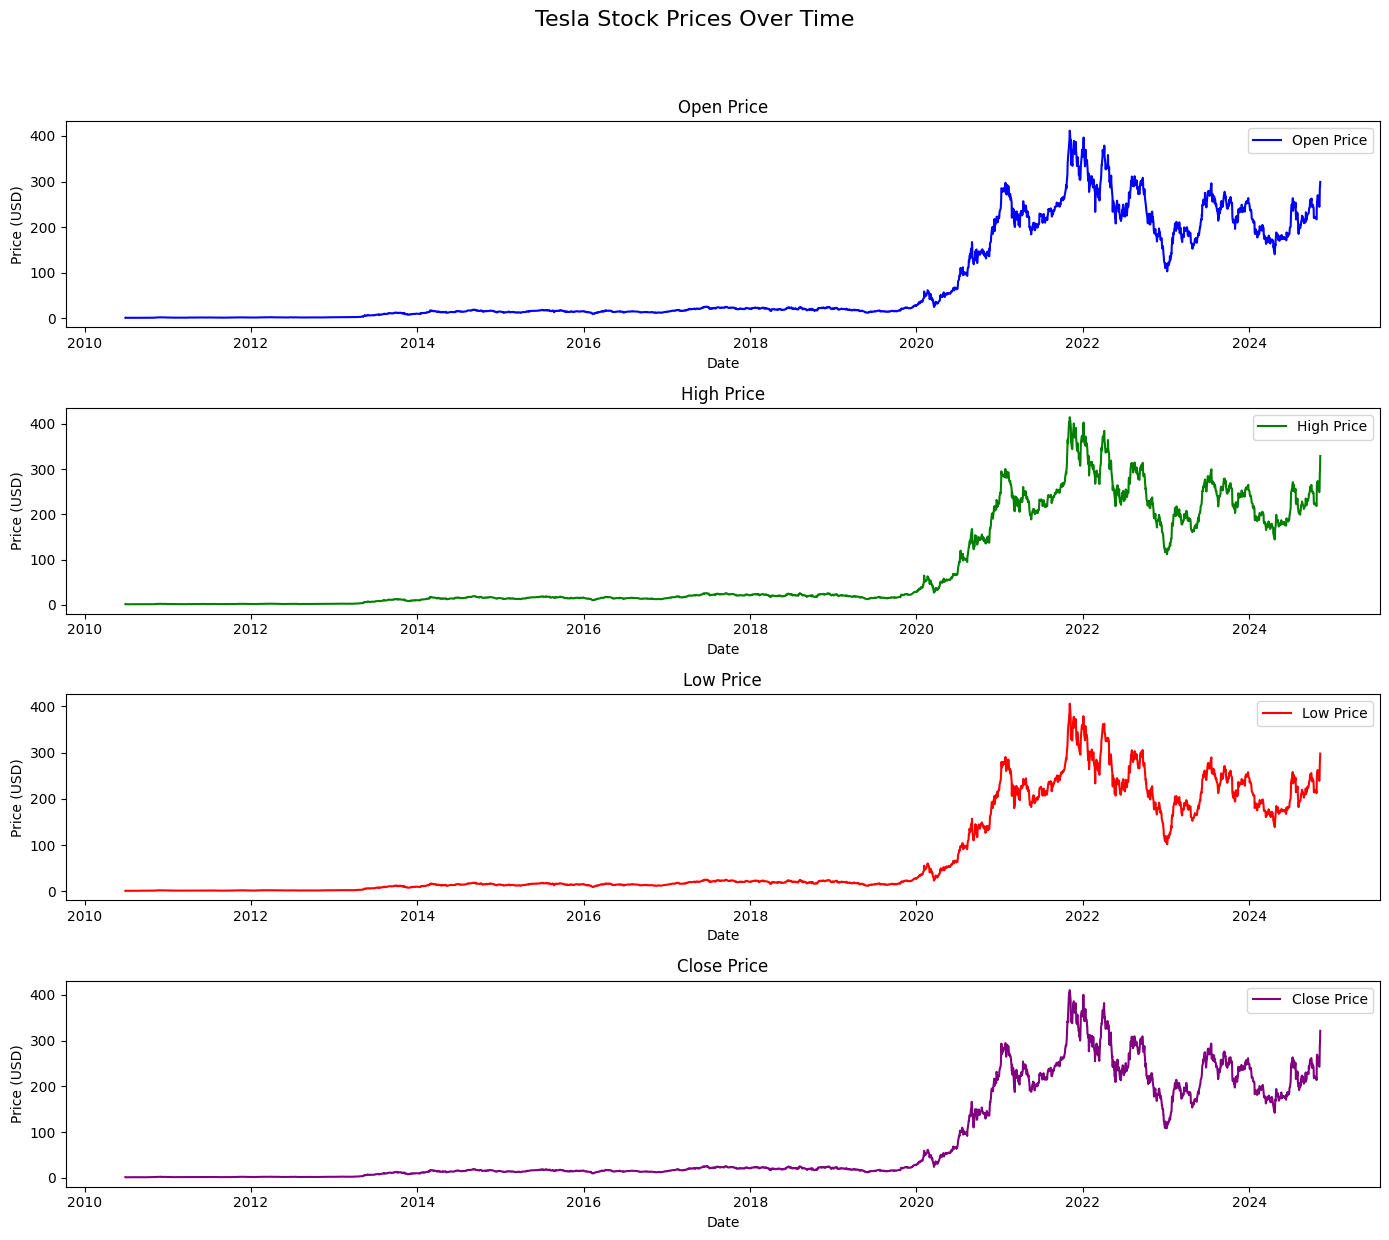

In [9]:
# Creating a 4x1 subplot for Open, High, Low, and Close prices without sharing the x-axis
fig, axs = plt.subplots(4, 1, figsize=(14, 13))
fig.suptitle('Tesla Stock Prices Over Time', fontsize=16)

# Plotting each price type in a separate subplot without shared x-axes
# 1. Open Price
axs[0].plot(stock_data.index, stock_data['Open'], label='Open Price', color='blue')
axs[0].set_title('Open Price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price (USD)')
axs[0].legend()

# 2. High Price
axs[1].plot(stock_data.index, stock_data['High'], label='High Price',color='green')
axs[1].set_title('High Price')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price (USD)')
axs[1].legend()


# 3. Low Price
axs[2].plot(stock_data.index, stock_data['Low'], label='Low Price', color='red')
axs[2].set_title('Low Price')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price (USD)')
axs[2].legend()

# 4. Close Price
axs[3].plot(stock_data.index, stock_data['Close'], label='Close Price',color='purple')
axs[3].set_title('Close Price')
axs[3].set_xlabel('Date')
axs[3].set_ylabel('Price (USD)')
axs[3].legend()

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


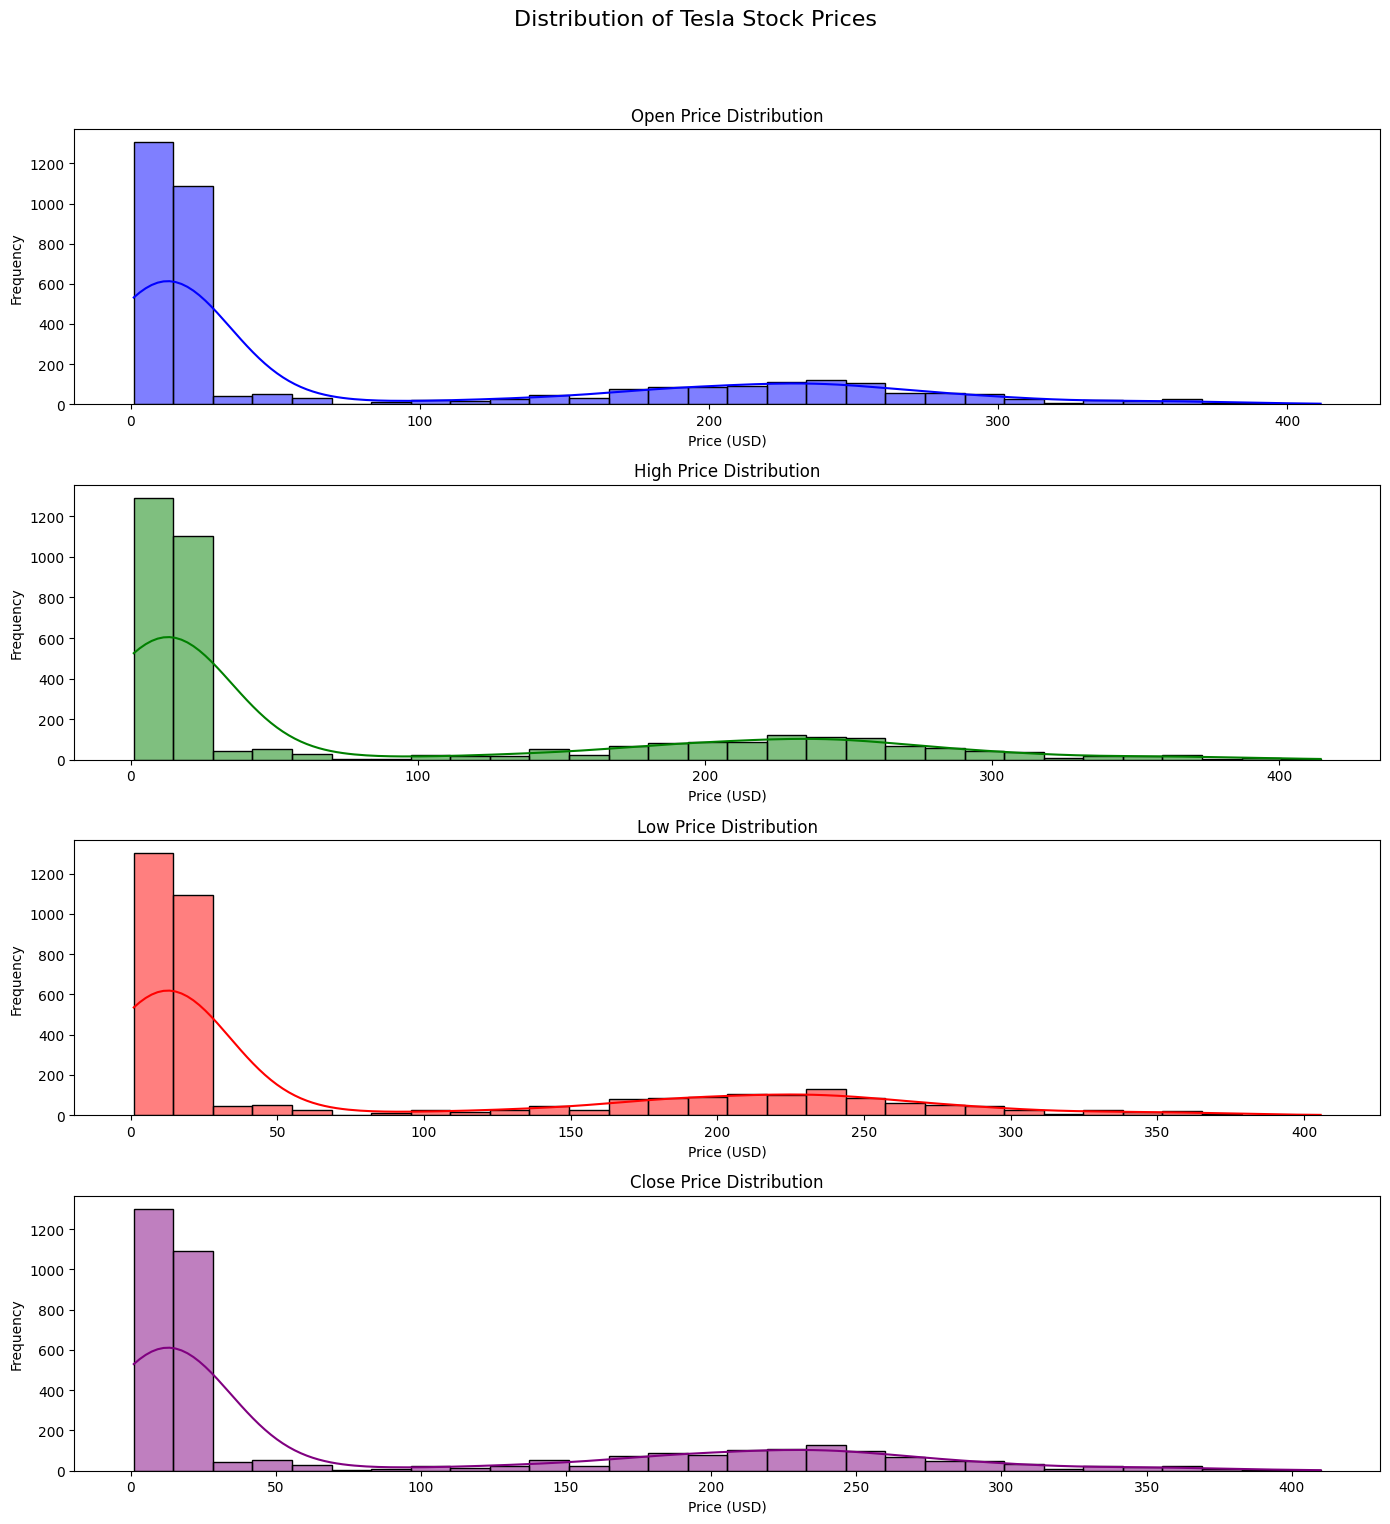

In [10]:
# Creating a 4x1 subplot for Open, High, Low, and Close price distributions
fig, axs = plt.subplots(4, 1, figsize=(14, 16))
fig.suptitle('Distribution of Tesla Stock Prices', fontsize=16)

# Plotting each price type as a histogram
# 1. Open Price Distribution
sns.histplot(stock_data['Open'], bins=30, kde=True, color='blue', ax=axs[0])
axs[0].set_title('Open Price Distribution')
axs[0].set_xlabel('Price (USD)')
axs[0].set_ylabel('Frequency')

# 2. High Price Distribution
sns.histplot(stock_data['High'], bins=30, kde=True, color='green', ax=axs[1])
axs[1].set_title('High Price Distribution')
axs[1].set_xlabel('Price (USD)')
axs[1].set_ylabel('Frequency')

# 3. Low Price Distribution
sns.histplot(stock_data['Low'], bins=30, kde=True, color='red', ax=axs[2])
axs[2].set_title('Low Price Distribution')
axs[2].set_xlabel('Price (USD)')
axs[2].set_ylabel('Frequency')

# 4. Close Price Distribution
sns.histplot(stock_data['Close'], bins=30, kde=True, color='purple', ax=axs[3])
axs[3].set_title('Close Price Distribution')
axs[3].set_xlabel('Price (USD)')
axs[3].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Outliers in stock prices:
Empty DataFrame
Columns: [Open, High, Low, Close]
Index: []


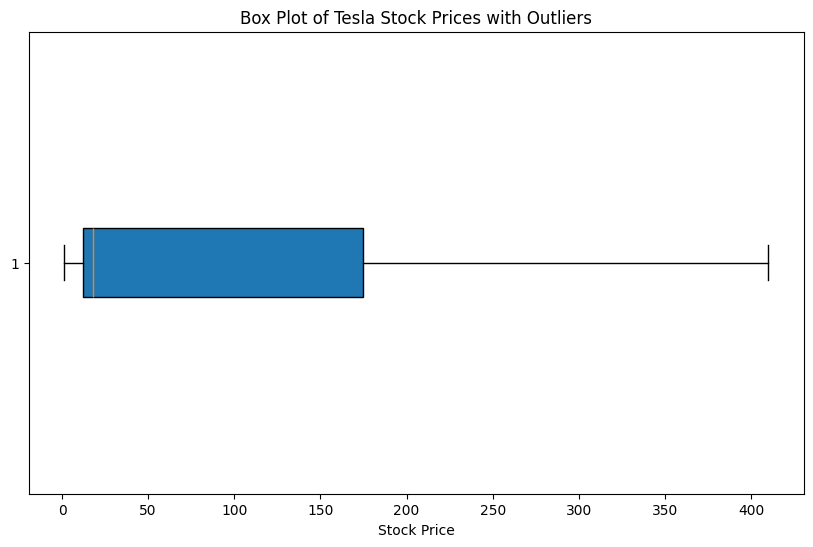

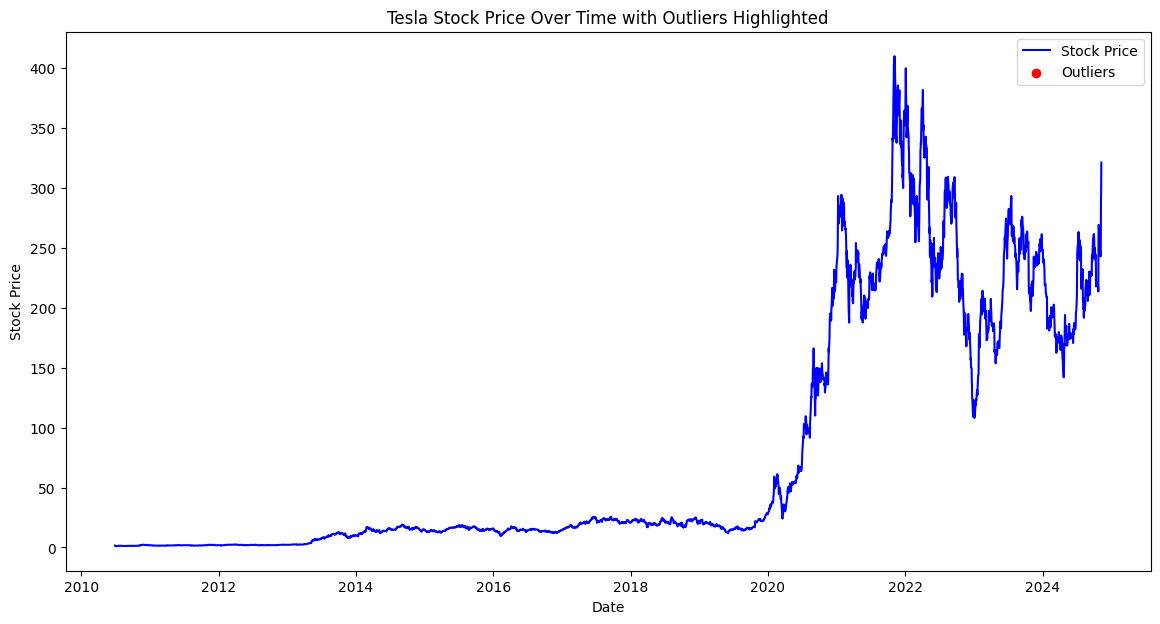

In [11]:

# Assuming 'stock_data' is your DataFrame and 'Close' is the column with stock prices
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = stock_data['Close'].quantile(0.25)
Q3 = stock_data['Close'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the data
outliers = stock_data[(stock_data['Close'] < lower_bound) | (stock_data['Close'] > upper_bound)]

# Print the outliers (if any)
print("Outliers in stock prices:")
print(outliers)

# Plotting the Box Plot with Outliers
plt.figure(figsize=(10, 6))
plt.boxplot(stock_data['Close'], vert=False, patch_artist=True)
plt.title("Box Plot of Tesla Stock Prices with Outliers")
plt.xlabel("Stock Price")
plt.show()

# Optionally, highlight outliers in a time series plot
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price', color='blue')
plt.scatter(outliers.index, outliers['Close'], color='red', label='Outliers', marker='o')
plt.title("Tesla Stock Price Over Time with Outliers Highlighted")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


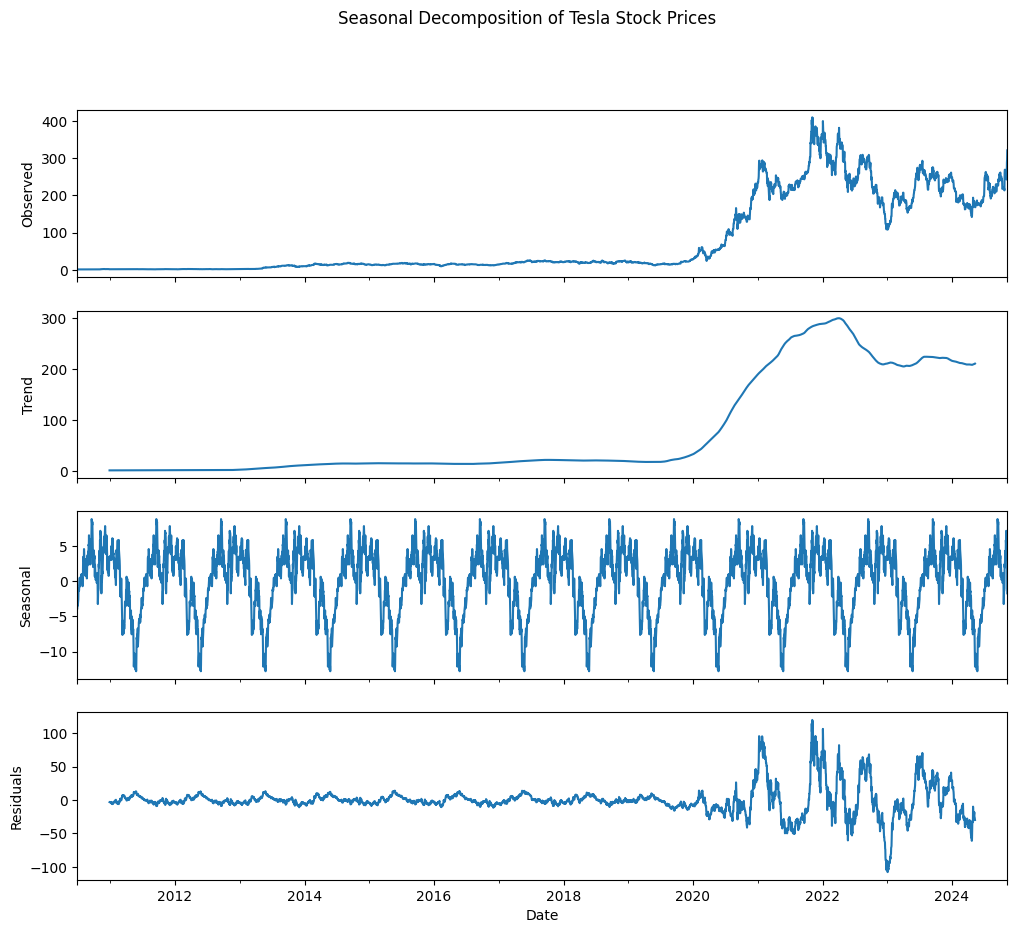

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure 'Date' is the index if not already set
#stock_data.set_index('Date', inplace=True)

# Resample data to a daily frequency to ensure even time intervals (if needed)
# If the data is already at daily intervals, you can skip this step.
stock_data_daily = stock_data['Close'].resample('D').ffill()

# Perform seasonal decomposition on the 'Close' prices
decomposition = seasonal_decompose(stock_data_daily, model='additive', period=365)  # period=365 for daily data

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
fig.suptitle('Seasonal Decomposition of Tesla Stock Prices')

decomposition.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')

decomposition.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')

decomposition.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')

decomposition.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residuals')
axes[3].set_xlabel('Date')

plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate Simple Moving Average (SMA) using the calculate_ma function
def calculate_ma(df, window):
    """
    Calculate the Simple Moving Average (MA/SMA) over a specified window.
    """
    return df['Close'].rolling(window=window).mean()

# Calculate 20-day and 50-day Moving Averages (MAs or SMAs)
stock_data['SMA_20'] = calculate_ma(stock_data, window=20)
stock_data['SMA_50'] = calculate_ma(stock_data, window=50)

# Exponential Moving Average (EMA)
def calculate_ema(df, span):
    """
    Calculate the Exponential Moving Average (EMA).
    """
    return df['Close'].ewm(span=span, adjust=False).mean()

# Calculate EMA 50 and EMA 200
stock_data['EMA_50'] = calculate_ema(stock_data, span=50)
stock_data['EMA_200'] = calculate_ema(stock_data, span=200)

# Moving Average Convergence/Divergence (MACD)
def calculate_macd(df, short_span=12, long_span=26, signal_span=9):
    """
    Calculate the MACD, Signal Line, and MACD Histogram.
    """
    short_ema = df['Close'].ewm(span=short_span, adjust=False).mean()
    long_ema = df['Close'].ewm(span=long_span, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_span, adjust=False).mean()
    macd_histogram = macd - signal
    return pd.DataFrame({'MACD': macd, 'Signal': signal, 'MACD_Histogram': macd_histogram})

# Calculate MACD, Signal Line, and MACD Histogram
macd_df = calculate_macd(stock_data)

# Add MACD components to the DataFrame
stock_data['MACD'] = macd_df['MACD']
stock_data['MACD_Signal'] = macd_df['Signal']
stock_data['MACD_Histogram'] = macd_df['MACD_Histogram']

# Relative Strength Index (RSI)
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI
stock_data['RSI'] = calculate_rsi(stock_data)

# Average Directional Index (ADX)
def calculate_adx(df, window=14):
    high = df['High']
    low = df['Low']
    close = df['Close']

    tr1 = high - low
    tr2 = abs(high - close.shift(1))
    tr3 = abs(low - close.shift(1))
    tr = pd.concat([tr1, tr2, tr3], axis=1).max(axis=1)

    plus_dm = high.diff()
    minus_dm = low.diff()

    plus_dm[plus_dm < 0] = 0
    minus_dm[minus_dm > 0] = 0

    atr = tr.rolling(window=window, min_periods=1).mean()
    plus_di = 100 * (plus_dm.ewm(alpha=1/window).mean() / atr)
    minus_di = abs(100 * (minus_dm.ewm(alpha=1/window).mean() / atr))

    dx = (abs(plus_di - minus_di) / (plus_di + minus_di)) * 100
    adx = dx.ewm(alpha=1/window).mean()

    return pd.DataFrame({'ADX': adx, 'Plus_DI': plus_di, 'Minus_DI': minus_di})

# Calculate ADX, Plus_DI, and Minus_DI
adx_df = calculate_adx(stock_data)

# Add ADX components to the DataFrame
stock_data['ADX'] = adx_df['ADX']
stock_data['Plus_DI'] = adx_df['Plus_DI']
stock_data['Minus_DI'] = adx_df['Minus_DI']

# Drop rows with NaN values at the beginning of the dataset (if any)
stock_data.dropna(inplace=True)

# Display the first few rows of the updated DataFrame
stock_data.head()



,Open,High,Low,Close,SMA_20,SMA_50,EMA_50,EMA_200,MACD,MACD_Signal,MACD_Histogram,RSI,ADX,Plus_DI,Minus_DI
Date,,,,,,,,,,,,,,,
2010-09-08 00:00:00-04:00,1.377333,1.396667,1.373333,1.393333,1.301467,1.322240,1.361035,1.486359,0.013624,-0.001767,0.015391,67.149673,15.148664,32.092516,19.425309
2010-09-09 00:00:00-04:00,1.400000,1.403333,1.379333,1.380667,1.310833,1.318000,1.361805,1.485307,0.015075,0.001602,0.013474,65.047002,15.941895,32.222275,18.931977
2010-09-10 00:00:00-04:00,1.383333,1.395333,1.317333,1.344667,1.319400,1.313120,1.361133,1.483908,0.013169,0.003915,0.009254,58.093849,15.238047,28.376171,25.006138
2010-09-13 00:00:00-04:00,1.392667,1.393333,1.366667,1.381333,1.327400,1.311467,1.361925,1.482887,0.014450,0.006022,0.008428,54.812352,14.586735,27.918925,24.603195
2010-09-14 00:00:00-04:00,1.369333,1.440000,1.368667,1.408000,1.335200,1.314027,1.363732,1.482142,0.017416,0.008301,0.009115,67.142833,14.802616,32.856891,23.046153


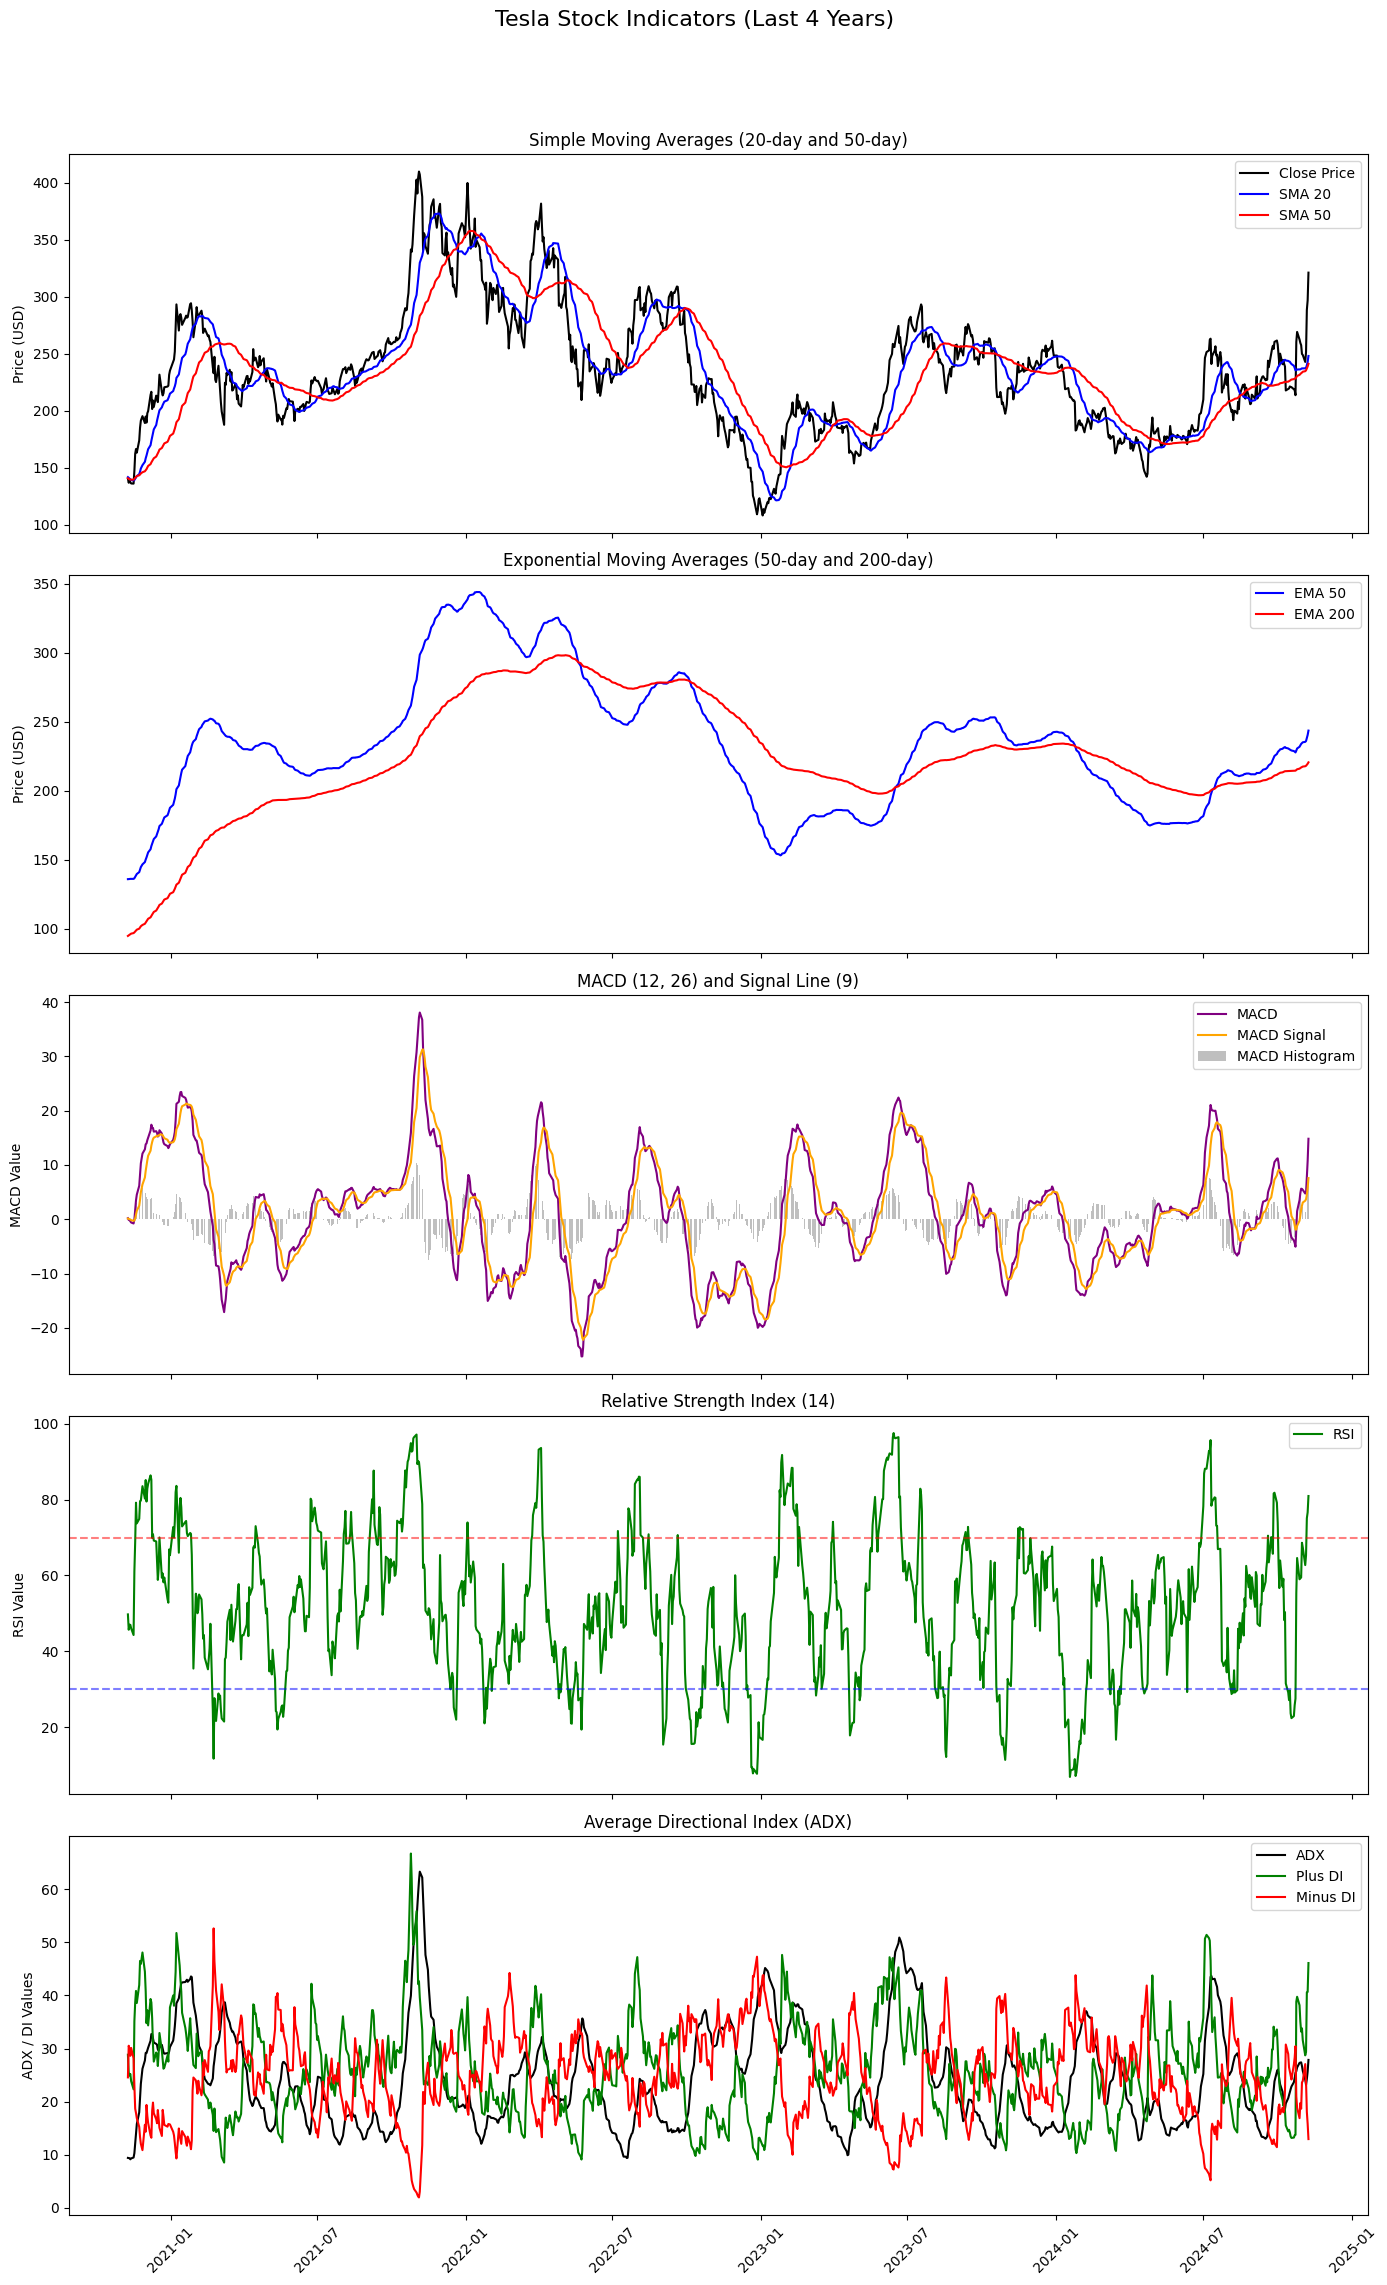

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Filter the data for the last four years
four_years_ago = stock_data.index.max() - timedelta(days=4*365)
filtered_data = stock_data[stock_data.index >= four_years_ago]

# Plot the indicators for the filtered data
fig, axs = plt.subplots(5, 1, figsize=(14, 24), sharex=True)
fig.suptitle('Tesla Stock Indicators (Last 4 Years)', fontsize=16)

# Plot SMAs and Closing Price
axs[0].plot(filtered_data.index, filtered_data['Close'], label='Close Price', color='black')
axs[0].plot(filtered_data.index, filtered_data['SMA_20'], label='SMA 20', color='blue')
axs[0].plot(filtered_data.index, filtered_data['SMA_50'], label='SMA 50', color='red')
axs[0].set_ylabel('Price (USD)')
axs[0].set_title('Simple Moving Averages (20-day and 50-day)')
axs[0].legend()

# Plot EMAs
axs[1].plot(filtered_data.index, filtered_data['EMA_50'], label='EMA 50', color='blue')
axs[1].plot(filtered_data.index, filtered_data['EMA_200'], label='EMA 200', color='red')
axs[1].set_ylabel('Price (USD)')
axs[1].set_title('Exponential Moving Averages (50-day and 200-day)')
axs[1].legend()

# Plot MACD
axs[2].plot(filtered_data.index, filtered_data['MACD'], label='MACD', color='purple')
axs[2].plot(filtered_data.index, filtered_data['MACD_Signal'], label='MACD Signal', color='orange')
axs[2].bar(filtered_data.index, filtered_data['MACD_Histogram'], label='MACD Histogram', color='grey', alpha=0.5)
axs[2].set_ylabel('MACD Value')
axs[2].set_title('MACD (12, 26) and Signal Line (9)')
axs[2].legend()

# Plot RSI
axs[3].plot(filtered_data.index, filtered_data['RSI'], label='RSI', color='green')
axs[3].axhline(70, linestyle='--', color='red', alpha=0.5)
axs[3].axhline(30, linestyle='--', color='blue', alpha=0.5)
axs[3].set_ylabel('RSI Value')
axs[3].set_title('Relative Strength Index (14)')
axs[3].legend()

# Plot ADX
axs[4].plot(filtered_data.index, filtered_data['ADX'], label='ADX', color='black')
axs[4].plot(filtered_data.index, filtered_data['Plus_DI'], label='Plus DI', color='green')
axs[4].plot(filtered_data.index, filtered_data['Minus_DI'], label='Minus DI', color='red')
axs[4].set_ylabel('ADX / DI Values')
axs[4].set_title('Average Directional Index (ADX)')
axs[4].legend()

plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


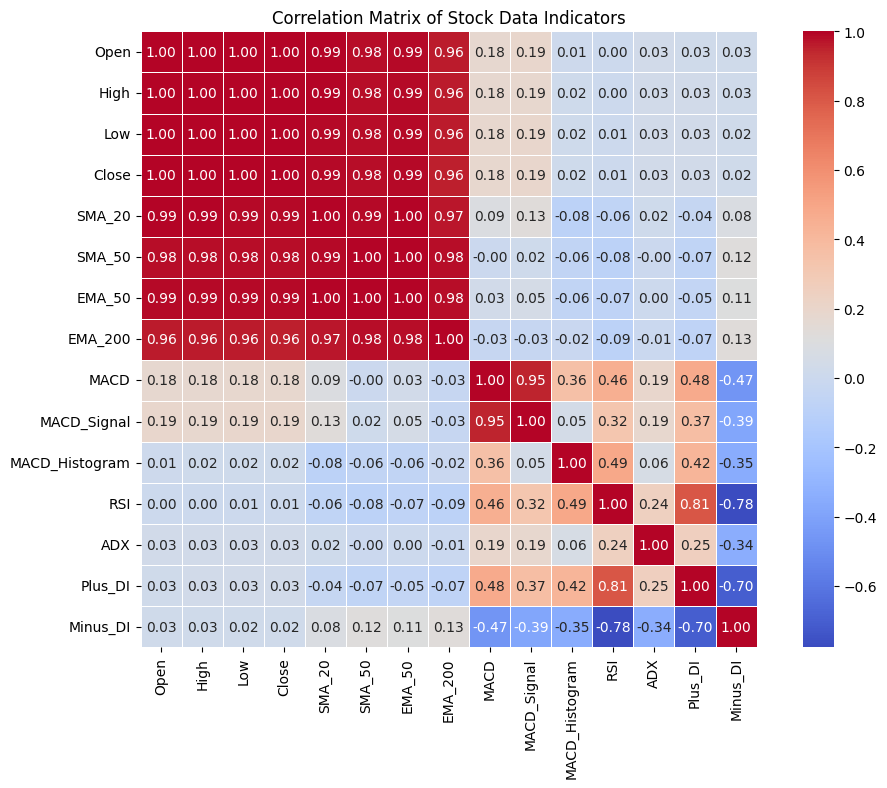

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for the stock data
correlation_matrix = stock_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True,
            linewidths=.5, annot_kws={"size": 10})
plt.title('Correlation Matrix of Stock Data Indicators')
plt.show()
